<a href="https://colab.research.google.com/github/yohan2001colombo/DataScience/blob/main/Brownian_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

In [9]:
#!pip install kaggle
from google.colab import files
data = files.upload()

Saving Talawakelle Tea Estate Stock Price History.csv to Talawakelle Tea Estate Stock Price History (3).csv


In [30]:
import pandas as pd
df = pd.read_csv("Talawakelle Tea Estate Stock Price History (1).csv")
print(df.head())

        Date  Closing Price
0  10/3/2022           98.8
1  10/4/2022           94.5
2  10/5/2022           98.7
3  10/6/2022           98.5
4  10/7/2022          100.0


In [31]:
# Create DataFrame
df1 = pd.DataFrame({'date': df["Date"]})

# Convert to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Calculate delta t (difference between consecutive dates)
df['delta_t'] = df1['date'].diff().dt.days


In [32]:
df.head()

,Date,Closing Price,delta_t
0,10/3/2022,98.8,NaN
1,10/4/2022,94.5,1.0
2,10/5/2022,98.7,1.0
3,10/6/2022,98.5,1.0
4,10/7/2022,100.0,1.0


In [33]:
df["log_returns"] = np.log(df["Closing Price"]) - np.log(df["Closing Price"].shift(1))

In [34]:
df = df.iloc[1:,]

In [35]:
df.head()

,Date,Closing Price,delta_t,log_returns
1,10/4/2022,94.5,1.0,-0.044498
2,10/5/2022,98.7,1.0,0.043485
3,10/6/2022,98.5,1.0,-0.002028
4,10/7/2022,100.0,1.0,0.015114
5,10/11/2022,92.0,4.0,-0.083382


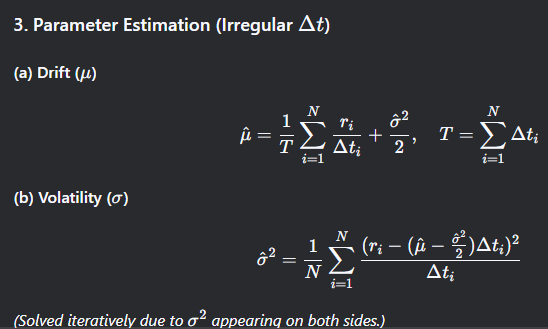

In [50]:
# Inputs: log_returns = [r1, r2, ...], delta_t = [Δt1, Δt2, ...]
def estimate_gbm_parameters(log_returns, delta_t, max_iter=100, tol=1e-4):
    mu_hat = np.mean(log_returns) / np.mean(delta_t)
    sigma2_hat = np.var(log_returns) / np.mean(delta_t)

    for i in range(max_iter):
        adj_returns = log_returns - (mu_hat - 0.5 * sigma2_hat) * delta_t
        new_sigma2 = np.mean(adj_returns**2 / delta_t)
        if abs(new_sigma2 - sigma2_hat) < tol:
            break
        sigma2_hat = new_sigma2
        mu_hat = np.mean(log_returns / delta_t) + 0.5 * sigma2_hat

    return mu_hat, np.sqrt(sigma2_hat)

In [51]:
mu_hat = estimate_gbm_parameters(df["log_returns"], df["delta_t"])[0]
sigma_hat = estimate_gbm_parameters(df["log_returns"], df["delta_t"])[1]

There are two assumptions must
be satisfied for GBM process. There are normality of
the log ratios and the independence from the previous
data.

In [52]:
# Standardized returns (should be ~N(0,1) if GBM holds)
log_returns = df["log_returns"]
delta_t = df["delta_t"]

z = (log_returns - (mu_hat - 0.5 * sigma_hat**2) * delta_t) / (sigma_hat * np.sqrt(delta_t))


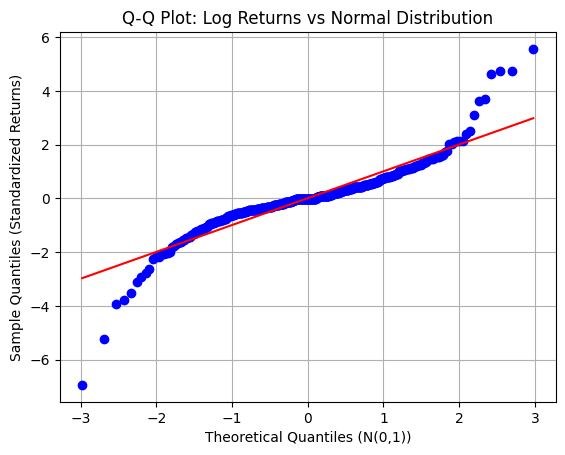

In [53]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(z, dist="norm", plot=plt)
plt.title("Q-Q Plot: Log Returns vs Normal Distribution")
plt.xlabel("Theoretical Quantiles (N(0,1))")
plt.ylabel("Sample Quantiles (Standardized Returns)")
plt.grid(True)
plt.show()

In [54]:
from scipy.stats import shapiro
_, p_value = shapiro(z)
print(f"Normality p-value: {p_value}")  # p > 0.05 → Normal

Normality p-value: 8.527533227521388e-20
